In [1]:
# import miscellaneous modules
import matplotlib.pyplot as plt
import os
import numpy as np
import time
import keras
import tensorflow as tf
import tensorflow_datasets as tfds
keras.__version__
tf.__version__

'2.17.0'

In [ ]:
!pip install ultralytics

In [ ]:
!pip install opencv-python
!pip install torch

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!pwd
%cd /content/drive/MyDrive/Colab Notebooks

/content
/content/drive/MyDrive/Colab Notebooks


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



100%|██████████| 134k/134k [00:00<00:00, 28.2MB/s]


image 1/1 /content/drive/MyDrive/Colab Notebooks/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 467.3ms
Speed: 14.8ms preprocess, 467.3ms inference, 55.8ms postprocess per image at shape (1, 3, 640, 480)


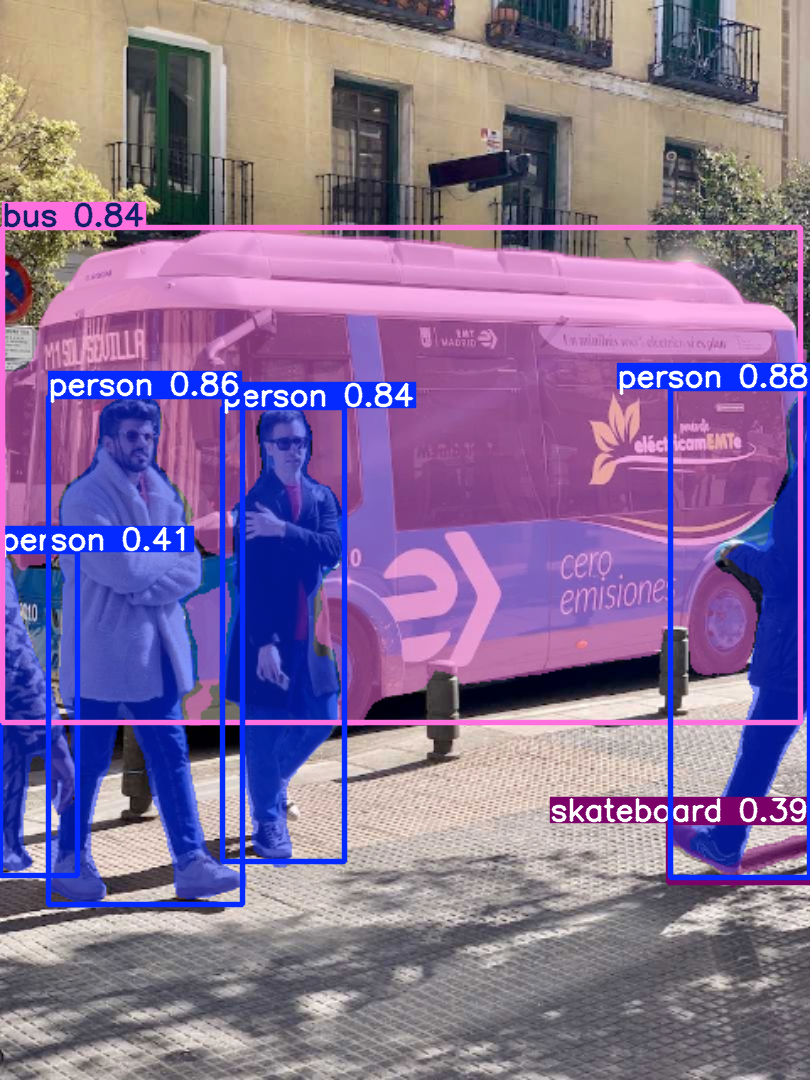

In [8]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n-seg.pt")  # load an official model
# model = YOLO("path/to/best.pt")  # load a custom model

# Predict with the model
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
results[0].show()

In [11]:
from ultralytics import YOLO
import cv2
# Load a model
model = YOLO("yolov8n-seg.pt")  # load an official model
# model = YOLO("path/to/best.pt")  # load a custom model

# Open the video file
video_path = "people.mp4"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        results = model(frame)
        # Visualize the results on the frame
        annotated_frame = results[0].plot()
        results[0].show()
        # Display the annotated frame
        # cv2.imshow("YOLOv8 Inference", annotated_frame)


        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.